**clamped condition**

In [1]:
using Plots
using LinearAlgebra

In [2]:
data_points = [(-1, 0.038), (-0.8, 0.058), (-0.60, 0.10), (-0.4, 0.20),(-0.2,0.3)]
k = length(data_points)

5

In [3]:
# number of equations 
n = k-1 
# number of unknows variables 
number_of_unknows_variables = 4*n

16

In [4]:
x_points = [x for (x, y) in data_points]
y_points = [y for (x, y) in data_points]

5-element Vector{Float64}:
 0.038
 0.058
 0.1
 0.2
 0.3

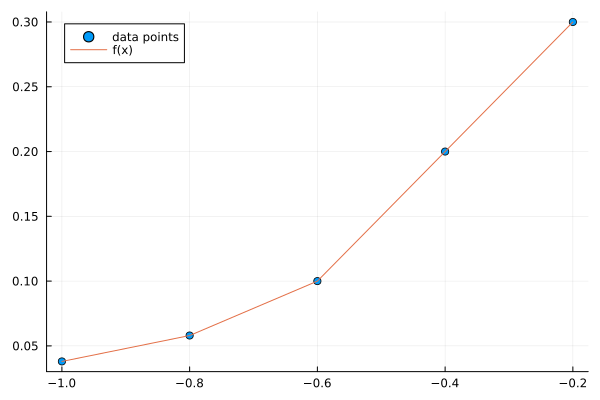

In [5]:
scatter(x_points, y_points, label="data points")
plot!(x_points,y_points, label="f(x)")

In [6]:
# A matrix
A = zeros(number_of_unknows_variables, number_of_unknows_variables)
# b vector
b = zeros(number_of_unknows_variables)

16-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [7]:
# fill A and b
for i in 1:n
    x_i = x_points[i]
    y_i = y_points[i]
    x_i_plus_1 = x_points[i+1]
    y_i_plus_1 = y_points[i+1]
    
    # fill b
    b[2*i-1] = y_i
    b[2*i] = y_i_plus_1
    # fill A
    A[2*i-1, 4*i-3:4*i] = [x_i^3, x_i^2, x_i, 1]

    A[2*i, 4*i-3:4*i] = [x_i_plus_1^3, x_i_plus_1^2, x_i_plus_1, 1]

end

In [8]:
# fill the first derivative

for i in 1:n-1
    x_i = x_points[i+1]
    x_i_plus_1 = x_points[i+2]
    A[2*n+i, 4*i-3:4*i] = [3*x_i^2, 2*x_i, 1, 0]
    A[2*n+i, 4*i+1:4*i+4] =  [-3*x_i^2, -2*x_i, -1, 0]

end

In [9]:
A

16×16 Matrix{Float64}:
 -1.0     1.0   -1.0  1.0   0.0    …   0.0  0.0   0.0    0.0    0.0  0.0
 -0.512   0.64  -0.8  1.0   0.0        0.0  0.0   0.0    0.0    0.0  0.0
  0.0     0.0    0.0  0.0  -0.512      0.0  0.0   0.0    0.0    0.0  0.0
  0.0     0.0    0.0  0.0  -0.216      0.0  0.0   0.0    0.0    0.0  0.0
  0.0     0.0    0.0  0.0   0.0       -0.6  1.0   0.0    0.0    0.0  0.0
  0.0     0.0    0.0  0.0   0.0    …  -0.4  1.0   0.0    0.0    0.0  0.0
  0.0     0.0    0.0  0.0   0.0        0.0  0.0  -0.064  0.16  -0.4  1.0
  0.0     0.0    0.0  0.0   0.0        0.0  0.0  -0.008  0.04  -0.2  1.0
  1.92   -1.6    1.0  0.0  -1.92       0.0  0.0   0.0    0.0    0.0  0.0
  0.0     0.0    0.0  0.0   1.08      -1.0  0.0   0.0    0.0    0.0  0.0
  0.0     0.0    0.0  0.0   0.0    …   1.0  0.0  -0.48   0.8   -1.0  0.0
  0.0     0.0    0.0  0.0   0.0        0.0  0.0   0.0    0.0    0.0  0.0
  0.0     0.0    0.0  0.0   0.0        0.0  0.0   0.0    0.0    0.0  0.0
  0.0     0.0    0.0  0.0   

In [10]:
# fill the second derivative
for i in 1:n-1
    x_i = x_points[i+1]
    A[3*n+i-1, 4*i-3:4*i] = [6*x_i, 2, 0, 0]
    A[3*n+i-1, 4*i+1:4*i+4] =  [-6*x_i, -2, 0, 0]
end

In [11]:
A1 = copy(A)
b1 = copy(b)

16-element Vector{Float64}:
 0.038
 0.058
 0.058
 0.1
 0.1
 0.2
 0.2
 0.3
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [12]:
# change here for the clamped spline interpolation

# 2nd order derivative 
A1[4*n-1, 1:4] = [6*x_points[1], 2, 0, 0]
A1[4*n, 4*n-3:4*n] = [6*x_points[n+1], 2, 0, 0]

b1[4*n-1] = 0
b1[4*n] = 0

# 1st order derivative
A[4*n-1, 1:4] = [3*x_points[1]^2, 2*x_points[1], 1, 0]
A[4*n, 4*n-3:4*n] = [3*x_points[n+1]^2, 2*x_points[n+1], 1, 0]
# dy/dx = 4 at x1 and xn
b[4*n-1] = 4
b[4*n] = 4



4

In [13]:
A

16×16 Matrix{Float64}:
 -1.0     1.0   -1.0  1.0   0.0    …   0.0  0.0   0.0     0.0    0.0  0.0
 -0.512   0.64  -0.8  1.0   0.0        0.0  0.0   0.0     0.0    0.0  0.0
  0.0     0.0    0.0  0.0  -0.512      0.0  0.0   0.0     0.0    0.0  0.0
  0.0     0.0    0.0  0.0  -0.216      0.0  0.0   0.0     0.0    0.0  0.0
  0.0     0.0    0.0  0.0   0.0       -0.6  1.0   0.0     0.0    0.0  0.0
  0.0     0.0    0.0  0.0   0.0    …  -0.4  1.0   0.0     0.0    0.0  0.0
  0.0     0.0    0.0  0.0   0.0        0.0  0.0  -0.064   0.16  -0.4  1.0
  0.0     0.0    0.0  0.0   0.0        0.0  0.0  -0.008   0.04  -0.2  1.0
  1.92   -1.6    1.0  0.0  -1.92       0.0  0.0   0.0     0.0    0.0  0.0
  0.0     0.0    0.0  0.0   1.08      -1.0  0.0   0.0     0.0    0.0  0.0
  0.0     0.0    0.0  0.0   0.0    …   1.0  0.0  -0.48    0.8   -1.0  0.0
 -4.8     2.0    0.0  0.0   4.8        0.0  0.0   0.0     0.0    0.0  0.0
  0.0     0.0    0.0  0.0  -3.6        0.0  0.0   0.0     0.0    0.0  0.0
  0.0     0.0  

In [14]:
A1

16×16 Matrix{Float64}:
 -1.0     1.0   -1.0  1.0   0.0    …   0.0  0.0   0.0     0.0    0.0  0.0
 -0.512   0.64  -0.8  1.0   0.0        0.0  0.0   0.0     0.0    0.0  0.0
  0.0     0.0    0.0  0.0  -0.512      0.0  0.0   0.0     0.0    0.0  0.0
  0.0     0.0    0.0  0.0  -0.216      0.0  0.0   0.0     0.0    0.0  0.0
  0.0     0.0    0.0  0.0   0.0       -0.6  1.0   0.0     0.0    0.0  0.0
  0.0     0.0    0.0  0.0   0.0    …  -0.4  1.0   0.0     0.0    0.0  0.0
  0.0     0.0    0.0  0.0   0.0        0.0  0.0  -0.064   0.16  -0.4  1.0
  0.0     0.0    0.0  0.0   0.0        0.0  0.0  -0.008   0.04  -0.2  1.0
  1.92   -1.6    1.0  0.0  -1.92       0.0  0.0   0.0     0.0    0.0  0.0
  0.0     0.0    0.0  0.0   1.08      -1.0  0.0   0.0     0.0    0.0  0.0
  0.0     0.0    0.0  0.0   0.0    …   1.0  0.0  -0.48    0.8   -1.0  0.0
 -4.8     2.0    0.0  0.0   4.8        0.0  0.0   0.0     0.0    0.0  0.0
  0.0     0.0    0.0  0.0  -3.6        0.0  0.0   0.0     0.0    0.0  0.0
  0.0     0.0  

In [15]:
x = A\b

16-element Vector{Float64}:
  70.19196428571365
 177.0374999999983
 147.4991071428556
  40.69157142857096
 -12.825892857142291
 -22.205357142856
 -11.895178571427827
  -1.81357142857127
 -14.388392857143119
 -25.01785714285749
 -13.58267857142872
  -2.15107142857145
  63.129464285714356
  68.00357142857149
  23.625892857142873
   2.810071428571429

In [16]:
x1 = A1\b1

16-element Vector{Float64}:
  0.21874999999999056
  0.6562499999999717
  0.7474999999999725
  0.34799999999999187
  1.6562500000000162
  4.106250000000034
  3.5075000000000225
  1.0840000000000047
 -2.343750000000015
 -3.0937500000000218
 -0.8125000000000098
  0.21999999999999867
  0.4687500000000055
  0.28125000000000333
  0.5375000000000003
  0.39999999999999997

In [17]:
# get the coefficients of the cubic spline
cublic_spline_coefficients = [(x[4*i-3], x[4*i-2], x[4*i-1], x[4*i]) for i in 1:n]
natural_cublic_spline_coefficients = [(x1[4*i-3], x1[4*i-2], x1[4*i-1], x1[4*i]) for i in 1:n]

4-element Vector{NTuple{4, Float64}}:
 (0.21874999999999056, 0.6562499999999717, 0.7474999999999725, 0.34799999999999187)
 (1.6562500000000162, 4.106250000000034, 3.5075000000000225, 1.0840000000000047)
 (-2.343750000000015, -3.0937500000000218, -0.8125000000000098, 0.21999999999999867)
 (0.4687500000000055, 0.28125000000000333, 0.5375000000000003, 0.39999999999999997)

In [18]:
cublic_spline_coefficients

4-element Vector{NTuple{4, Float64}}:
 (70.19196428571365, 177.0374999999983, 147.4991071428556, 40.69157142857096)
 (-12.825892857142291, -22.205357142856, -11.895178571427827, -1.81357142857127)
 (-14.388392857143119, -25.01785714285749, -13.58267857142872, -2.15107142857145)
 (63.129464285714356, 68.00357142857149, 23.625892857142873, 2.810071428571429)

In [19]:
cublic_polyomial(x)=(a,b,c,d)->a*x^3+b*x^2+c*x+d

cublic_polyomial (generic function with 1 method)

In [20]:
# get the intervals of the cubic spline
intervals = [(x_points[i], x_points[i+1]) for i in 1:n]

4-element Vector{Tuple{Real, Float64}}:
 (-1, -0.8)
 (-0.8, -0.6)
 (-0.6, -0.4)
 (-0.4, -0.2)

In [21]:
function get_index(x)
    for i in 1:n
        if x >= intervals[i][1] && x <= intervals[i][2]
            return i
        end
    end
end

get_index (generic function with 1 method)

In [22]:
function cubic_spline(x,cofficients)
    i = get_index(x)
    a, b, c, d = cofficients[i]
    return cublic_polyomial(x)(a, b, c, d)
end

cubic_spline (generic function with 1 method)

In [23]:
x_first_point = x_points[1]
x_last_point = x_points[end]

x_values = range(x_first_point, x_last_point, length=100)

-1.0:0.00808080808080808:-0.2

In [24]:
y_values = [cubic_spline(x,cublic_spline_coefficients) for x in x_values]
y_values_natural = [cubic_spline(x,natural_cublic_spline_coefficients) for x in x_values]

100-element Vector{Float64}:
 0.03800000000000048
 0.03873748916571118
 0.039475670901444326
 0.0402152377772218
 0.04095688236306588
 0.04170129722899907
 0.04244917494504319
 0.043201208081220854
 0.04395808920755406
 0.044720510894065146
 ⋮
 0.2687622475133954
 0.27269293795005456
 0.27661323983638036
 0.28052463725099175
 0.28442861427250776
 0.28832665497954757
 0.29222024345073017
 0.2961108637646746
 0.3

In [25]:
println(cubic_spline(-0.3,cublic_spline_coefficients))
print(cubic_spline(-0.3,natural_cublic_spline_coefficients))

0.1381294642857136
0.25140625000000005

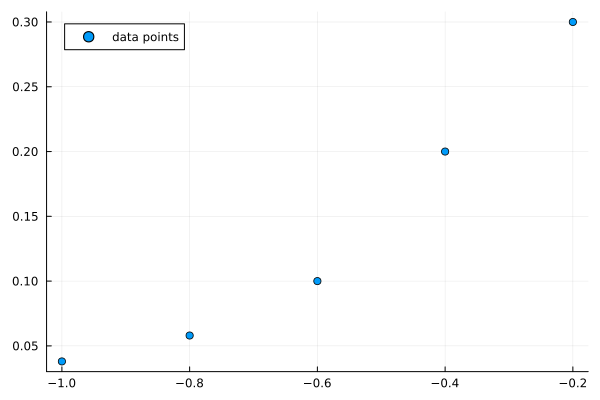

In [26]:
scatter(x_points, y_points, label="data points")

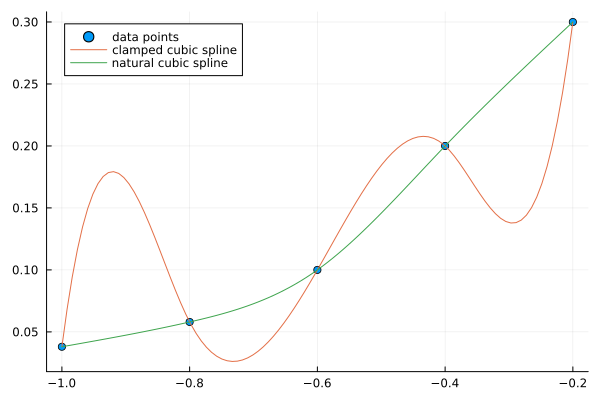

In [27]:
plot!(x_values, y_values, label="clamped cubic spline")
plot!(x_values, y_values_natural, label="natural cubic spline")